<a href="https://colab.research.google.com/github/Utpal-Mishra/Python-Stock-Prediction/blob/main/EdurekaStockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Installation

In [ ]:
!pip install tpot

### YOUTUBE VIDEO

from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/watch?v=QIUxPv5PJOY" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

# STOCK PRICE PREDICTION

> Artificial Recurrent Neural Network

> Long Short Term Memory

###Packages

In [ ]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


###Reading File

In [ ]:
data = web.Reader('AAPL', data_source = 'yahoo', start = '2012-01-01', end = '2019-12-17').reset_index()
print(data.shape)
data.head()

(2003, 7)


,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.765709
1,2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.038536
2,2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.605175
3,2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.144630
4,2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.061932


###Data Details

In [ ]:
train.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2003.000000,2003.000000,2003.000000,2003.000000,2.003000e+03,2003.000000
mean,127.194100,124.954538,126.079166,126.109797,5.960691e+07,118.853006
std,50.028310,49.234509,49.592770,49.679272,4.688887e+07,51.513112
min,57.085712,55.014286,55.424286,55.790001,1.136200e+07,48.921928
25%,86.649998,84.915001,85.766430,85.971428,2.760790e+07,74.975204
50%,114.019997,111.660004,112.820000,112.919998,4.369990e+07,105.038940
75%,165.939995,162.125000,163.845001,163.970001,7.482090e+07,158.054070
max,281.769989,278.799988,279.570007,280.410004,3.765300e+08,278.488770


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2003 entries, 0 to 2002
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2003 non-null   datetime64[ns]
 1   High       2003 non-null   float64       
 2   Low        2003 non-null   float64       
 3   Open       2003 non-null   float64       
 4   Close      2003 non-null   float64       
 5   Volume     2003 non-null   float64       
 6   Adj Close  2003 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 109.7 KB


###Checking Missing Values

In [ ]:
data.isna().sum() #.any()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

###Segregating Date

In [ ]:
data['Day'] = pd.DatetimeIndex(data['Date']).day
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Year'] = pd.DatetimeIndex(data['Date']).year
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Day,Month,Year
0,2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.765709,3,1,2012
1,2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.038536,4,1,2012
2,2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.605175,5,1,2012
3,2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.144630,6,1,2012
4,2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.061932,9,1,2012


In [ ]:
"""data.drop(['Date', 'Close: 30 Days Means'], axis = 1, inplace = True)
data.head()"""

"data.drop(['Date', 'Close: 30 Days Means'], axis = 1, inplace = True)\ndata.head()"

#Visualization

###Groupby with Year and Open Columns

Year
2012    AxesSubplot(0.08,0.07;0.87x0.81)
2013    AxesSubplot(0.08,0.07;0.87x0.81)
2014    AxesSubplot(0.08,0.07;0.87x0.81)
2015    AxesSubplot(0.08,0.07;0.87x0.81)
2016    AxesSubplot(0.08,0.07;0.87x0.81)
2017    AxesSubplot(0.08,0.07;0.87x0.81)
2018    AxesSubplot(0.08,0.07;0.87x0.81)
2019    AxesSubplot(0.08,0.07;0.87x0.81)
Name: Open, dtype: object

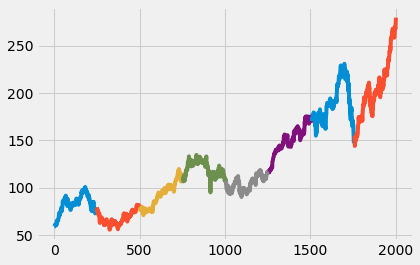

In [ ]:
train.groupby('Year')['Open'].plot()

###Stock Analysis from Past 15 Days data

In [ ]:
data[['High',	'Low',	'Open',	'Close',	'Volume',	'Adj Close']].rolling(15).mean().head(20)

,High,Low,Open,Close,Volume,Adj Close
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


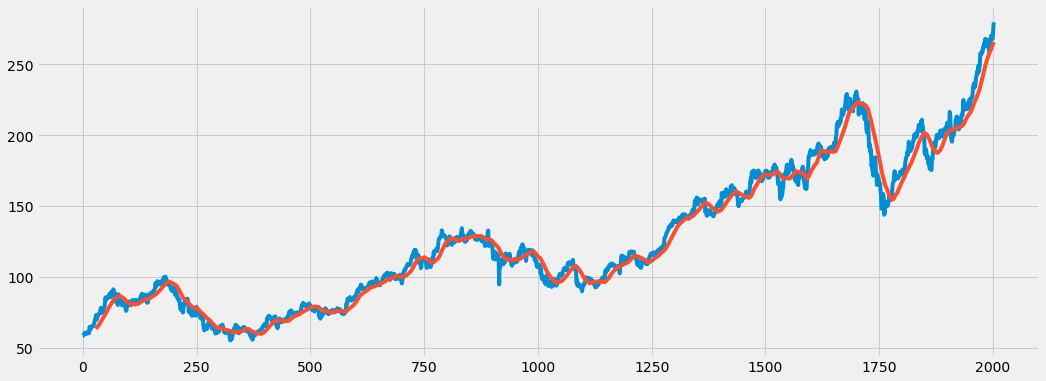

In [ ]:
data.Open.plot(figsize=(16,6))
data.rolling(window = 30).mean()['Close'].plot()

###Analysis of Close VS Close: 30 Days Means

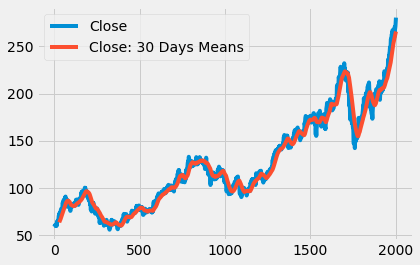

In [ ]:
data['Close: 30 Days Means'] = data['Close'].rolling(window = 30).mean()
data[['Close', 'Close: 30 Days Means']].plot()

###Expected Transformation for a period

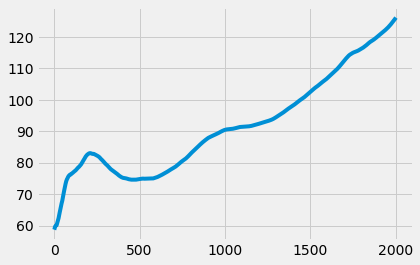

In [ ]:
data.Close.expanding(min_periods = 1).mean().plot()

#Training Data

In [ ]:
train = pd.DataFrame(data['Open'])
print(train.shape)

(2003, 1)


###Scaling with MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
SC = MinMaxScaler(feature_range = (0, 1))
train_scaled = SC.fit_transform(train)

###Splitting Data to X_train and Y_train

In [ ]:
X_train = []
Y_train = []

for i in range(60, 1258):
  X_train.append(train_scaled[i-60:i, 0])
  Y_train.append(train_scaled[i, 0])

X_train, Y_train = np.array(X_train), np.array(Y_train)
print("X_train.shape: ", X_train.shape, "Y_train.shape: ", Y_train.shape)

X_train.shape:  (1198, 60) Y_train.shape:  (1198,)


###Reshaping X_train to (X_train.shape[0], X_train.shape[1], 1)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print("X_train.shape: ", X_train.shape)

X_train.shape:  (1198, 60, 1)


###Building LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

> Creating Sequential Object

In [ ]:
regressor = Sequential()  

> Adding Layers

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2)) #For Regularization, from overfitting:: Dropouts units in network

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

> Compiling and Fitting the Training Data

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, Y_train, epochs = 100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 4s 100ms/step - loss: 2.0852e-04
Epoch 2/100
38/38 [==============================] - 4s 106ms/step - loss: 1.5822e-04
Epoch 3/100
38/38 [==============================] - 4s 105ms/step - loss: 1.4510e-04
Epoch 4/100
38/38 [==============================] - 4s 104ms/step - loss: 1.8221e-04
Epoch 5/100
38/38 [==============================] - 4s 101ms/step - loss: 1.6239e-04
Epoch 6/100
38/38 [==============================] - 4s 103ms/step - loss: 1.6868e-04
Epoch 7/100
38/38 [==============================] - 4s 106ms/step - loss: 1.5898e-04
Epoch 8/100
38/38 [==============================] - 4s 101ms/step - loss: 1.7561e-04
Epoch 9/100
38/38 [==============================] - 4s 102ms/step - loss: 1.7164e-04
Epoch 10/100
38/38 [==============================] - 4s 101ms/step - loss: 1.7171e-04
Epoch 11/100
38/38 [==============================] - 4s 101ms/step - loss: 1.7277e-04
Epoch 12/100
38/38 [==============================] 

#Testing Data

###Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Loading File

In [ ]:
path = '/content/drive/My Drive/Edureka/Stock Market Price/Google_Stock_Price_Test.csv'

data = pd.read_csv(path)
print(data.shape)
data.head()

(20, 6)


,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


###Real Stock Price

In [ ]:
real_stock_price = data.iloc[:, 1:2].values

###Data Details

In [ ]:
data.describe()

,Open,High,Low,Close
count,20.000000,20.000000,20.000000,20.000000
mean,807.526000,811.926500,801.949500,807.904500
std,15.125428,14.381198,13.278607,13.210088
min,778.810000,789.630000,775.800000,786.140000
25%,802.965000,806.735000,797.427500,802.282500
50%,806.995000,808.640000,801.530000,806.110000
75%,809.560000,817.097500,804.477500,810.760000
max,837.810000,841.950000,827.010000,835.670000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


###Data Pre-processing

In [ ]:
data['Volume'] = data['Volume'].str.replace(',', '').astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.1+ KB


###Building Testing Data

In [ ]:
test = pd.DataFrame(data['Open'])
print(test.shape)
test.head()

(20, 1)


,Open
0,778.81
1,788.36
2,786.08
3,795.26
4,806.40


In [ ]:
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()

total = pd.concat((train['Open'], test['Open']), axis = 0)
inputs = total[len(total) - len(data) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.fit_transform(inputs)

X_test = []
for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

###Predicting

In [ ]:
predicted_stock_price = pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


#Plotting

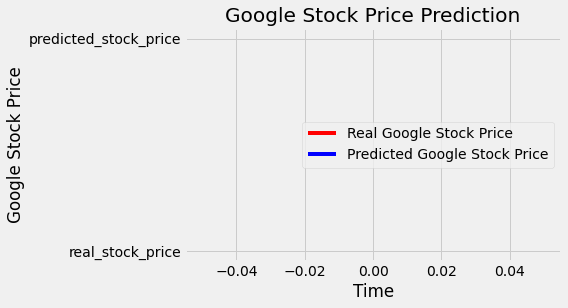

In [ ]:
plt.plot('real_stock_price', color = 'red', label = 'Real Google Stock Price')
plt.plot('predicted_stock_price', color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

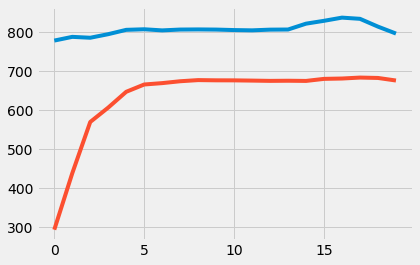

In [ ]:
plt.plot(real_stock_price)
plt.plot(predicted_stock_price)
plt.show()